In [1]:
from matplotlib import pyplot
from matplotlib.image import imread

# organize dataset into a useful structure
from os import makedirs
from os import listdir
from os import path

from shutil import copyfile
from random import seed
from random import random

In [2]:
def load_into_diff_directories():
    # create directories
    dataset_home = 'train_dataset'
        
    src_directory = 'train'
    cat_count = 0
    dog_count = 0
    
    size = 200
    
    for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst = dataset_home + '/' + file

        if file.startswith('cat') and cat_count < size:
            copyfile(src, dst)
            cat_count += 1 
                        
        elif file.startswith('dog') and dog_count < size:
            copyfile(src, dst)
            dog_count += 1
            
        elif cat_count >= size and dog_count >= size:
            print("Dog count ", dog_count)
            print("Cat count ", cat_count)
            break

In [3]:
load_into_diff_directories()

Dog count  200
Cat count  200


In [4]:
# baseline model for the dogs vs cats dataset
import sys
from os import listdir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras import layers, models, regularizers, optimizers

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [5]:
path = 'train_dataset/'
filenames = listdir(path)
filenames[:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [6]:
label = []
for filename in filenames:
    if filename.split('.')[0] =='cat':
        label.append('1')
    else:
        label.append('0')

In [7]:
df = pd.DataFrame({
                   'name':filenames,
                   'label':label
                 })

0    200
1    200
Name: label, dtype: int64


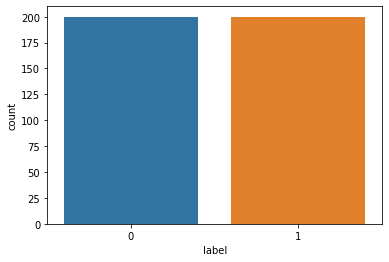

In [8]:
print(df['label'].value_counts())
sns.countplot(data=df, x=df['label']);

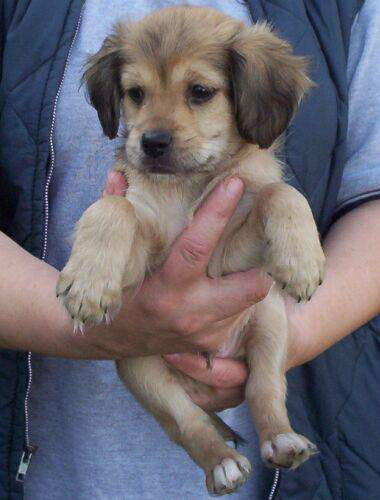

In [9]:
load_img(path+'dog.8011.jpg')

In [10]:
train, test_val = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=17)
test, val = train_test_split(test_val, test_size=0.5,  stratify=test_val['label'], random_state=17)

In [11]:
print('train labels:\n',train['label'].value_counts(),
      '\n\nvalidataion labels:\n',val['label'].value_counts(),
      '\n\ntest labels:\n',test['label'].value_counts(),
      sep='')

train labels:
1    160
0    160
Name: label, dtype: int64

validataion labels:
0    20
1    20
Name: label, dtype: int64

test labels:
1    20
0    20
Name: label, dtype: int64


In [12]:
train.head()

,name,label
249,cat.7476.jpg,1
292,cat.9473.jpg,1
272,dog.4373.jpg,0
188,cat.10804.jpg,1
85,cat.4433.jpg,1


In [13]:
model = ResNet152(include_top=False, input_shape=(224, 224, 3))

for layer in model.layers:
    layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

2022-06-13 11:25:58.385879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block6_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block6_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, 14, 14, 1024  525312      ['conv3_block8_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block4_1_relu[0][0]']    
                                                                                                  
 conv4_block4_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block4_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block10_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block10_1_relu[0][0]']   
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block13_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block13_1_relu[0][0]']   
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block13_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block16_1_relu[0][0]']   
                                                                                                  
 conv4_block16_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block16_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block19_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block19_1_relu[0][0]']   
                                                                                                  
 conv4_block19_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block22_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block22_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block22_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block22_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block22_1_relu[0][0]']   
                                                                                                  
 conv4_block22_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_2_conv[0][0]']   
 lization)

 conv4_block25_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block24_out[0][0]']      
                                                                                                  
 conv4_block25_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block25_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block25_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block25_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block27_out[0][0]']      
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block28_1_relu[0][0]']   
          

                                )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block30_out[0][0]']      
                                                                                                  
 conv4_block31_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block31_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block33_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block34_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block33_out[0][0]']      
                                                                                                  
 conv4_block34_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block34_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block34_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block34_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block36_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 512)    524800      ['conv4_block36_out[0][0]']      
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)       

                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
 flatten (Flatten)              (None, 100352)       0           ['conv5_block3_out[0][0]']       
                                                                                                  
 dense (Dense)                  (None, 128)          12845184    ['flatten[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 1)            129         ['dense[0][0]']                  
                                                                                                  
Total para

In [15]:
datagen = ImageDataGenerator(featurewise_center=True)#, preprocessing_function=preprocess_input)

# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]

train_data = datagen.flow_from_dataframe(train,
                                         directory=path,
                                         x_col='name',
                                         y_col='label',
                                         class_mode='binary', 
                                         batch_size=32, 
                                         target_size=(224, 224)
                                        )

val_data = datagen.flow_from_dataframe(val,
                                       directory=path,
                                       x_col='name',
                                       y_col='label',
                                       class_mode='binary',
                                       batch_size=32, 
                                       target_size=(224, 224)  
                                      )


Found 320 validated image filenames belonging to 2 classes.
Found 40 validated image filenames belonging to 2 classes.


In [16]:
early_stopping_cb = EarlyStopping(monitor='val_accuracy', 
                                  patience=10, 
                                  restore_best_weights=True)

history = model.fit(train_data, 
                    steps_per_epoch=len(train_data), 
                    validation_data=val_data,
                    epochs=20, 
                    verbose=0, 
                    callbacks=[early_stopping_cb]
                   )

print(history)

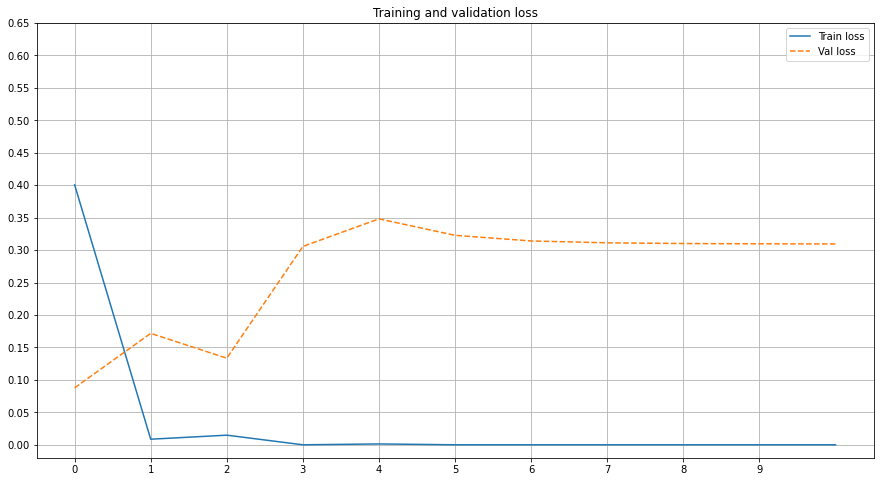

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,8))
plt.plot(loss, label='Train loss')
plt.plot(val_loss,'--', label='Val loss')
plt.title('Training and validation loss')
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0, 0.7, 0.05));
plt.grid()
plt.legend();

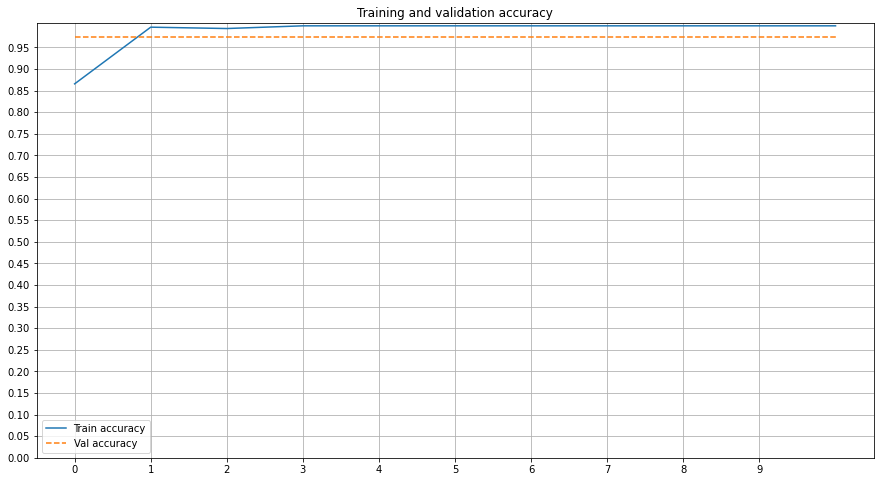

In [18]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

plt.figure(figsize=(15,8))
plt.plot(loss, label='Train accuracy')
plt.plot(val_loss,'--', label='Val accuracy')
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0, 1.0, 0.05));
plt.grid()
plt.legend();

In [19]:
test_data = datagen.flow_from_dataframe(test,
                                        directory=path,
                                        x_col='name',
                                        y_col='label',
                                        class_mode='binary',
                                        shuffle=False,
                                        batch_size=32, 
                                        target_size=(224, 224)  
                                       )

Found 40 validated image filenames belonging to 2 classes.


In [20]:
model.evaluate(test_data)

2/2 [==============================] - 6s 1s/step - loss: 0.0540 - accuracy: 0.9750


[0.053975533694028854, 0.9750000238418579]

In [21]:
test_pred = model.predict(test_data)


2/2 [==============================] - 7s 1s/step


In [22]:
pred_label = test_pred > 0.5
true_label = test_data.classes

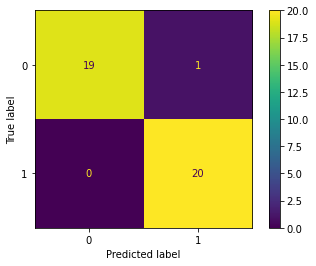

In [23]:
ConfusionMatrixDisplay(confusion_matrix(true_label, pred_label), 
                       display_labels=test_data.class_indices).plot();

In [24]:
def load_image(filename):
    img = load_img(filename, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape(1, 224, 224, 3)
    
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

In [25]:
img = load_image('sample2.jpg')
result = model.predict(img)
print(result[0])

1/1 [==============================] - 2s 2s/step
[1.1611948e-05]


In [26]:
model.save('dog_vs_cat_model_ResNet50.h5')
# model = load_model('dog_vs_cat_model.h5')